# Notebook for the decision tree task

In [2]:
# imports

import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# decision tree
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

Load the train and test data sets

In [18]:
train_dataset_oh = pd.read_csv('../train_insurance_one_hot.csv')
x_train = train_dataset_oh.drop(columns=['id','charges','chargeGroup'], inplace=False)
y_train = train_dataset_oh[["chargeGroup"]]
print(x_train.columns)
test_dataset_oh = pd.read_csv('../test_insurance_one_hot.csv')
x_test = test_dataset_oh.drop(columns=['id','charges','chargeGroup'], inplace=False)
y_test = test_dataset_oh[["chargeGroup"]]

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


## a)

In [4]:
acc = (y_test == "low").sum() / len(y_test)
acc=round(acc,2)
print(f"The wishful-thinking model accuracy is {acc.iloc[0]}")

The wishful-thinking model accuracy is 0.49


## b)

In [5]:
#compute mode
modes=y_train.iloc[:,0].mode(dropna=True).tolist()
#compute acc
acc=(y_test == modes).sum() / len(y_test)
acc=round(acc,2)
print(f"The mode-based model accuracy is {acc.iloc[0]}")

The mode-based model accuracy is 0.39


## c)

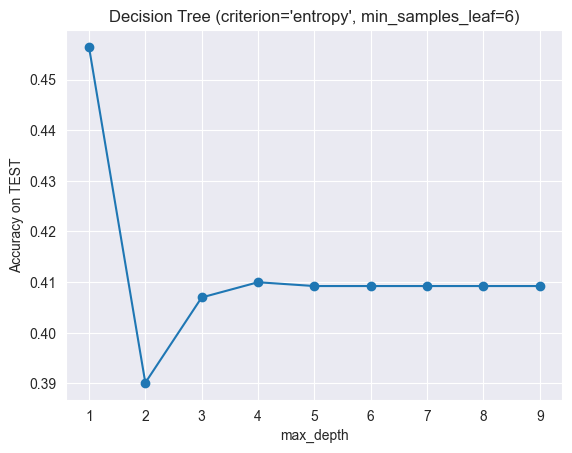

In [6]:
acc_list=[]
for d in range(1,10):
    clf = tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=6,
        random_state=42,
        max_depth = d)
    clf.fit(x_train,y_train)
    res=clf.predict(x_test)
    acc=(y_test.to_numpy()==res).mean()
    acc_list.append(acc)
big=max(acc_list)
plt.plot(range(1,10), acc_list, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy on TEST")
plt.title("Decision Tree (criterion='entropy', min_samples_leaf=6)")
plt.show()


## D)

predict chargeGroup = ['low']


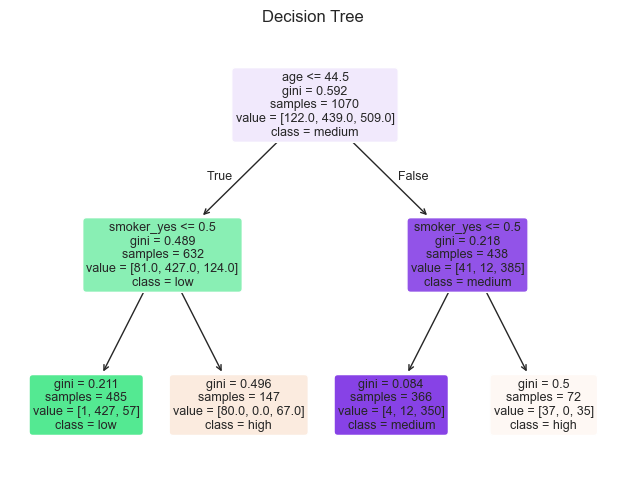

In [31]:
#decision tree
clf = tree.DecisionTreeClassifier(
    criterion='gini',
    min_samples_leaf=6,
    random_state=42,
    max_depth=2
)
clf.fit(x_train,y_train)
#print(clf.classes_)
plot_tree(
    clf,
    feature_names=x_train.columns,
    class_names=[str(c) for c in clf.classes_],  # 或手动：["high","low","medium"]
    filled=True,
    rounded=True,
    fontsize=9,
)

plt.tight_layout()
plt.title("Decision Tree ")

sample = pd.Series([42,36,2,0,1,1,0,0,1,0,0], index=x_train.columns, dtype=float)

#converte to dataframe
row = sample.to_frame().T



pred = clf.predict(row)
print("predict chargeGroup =", pred)